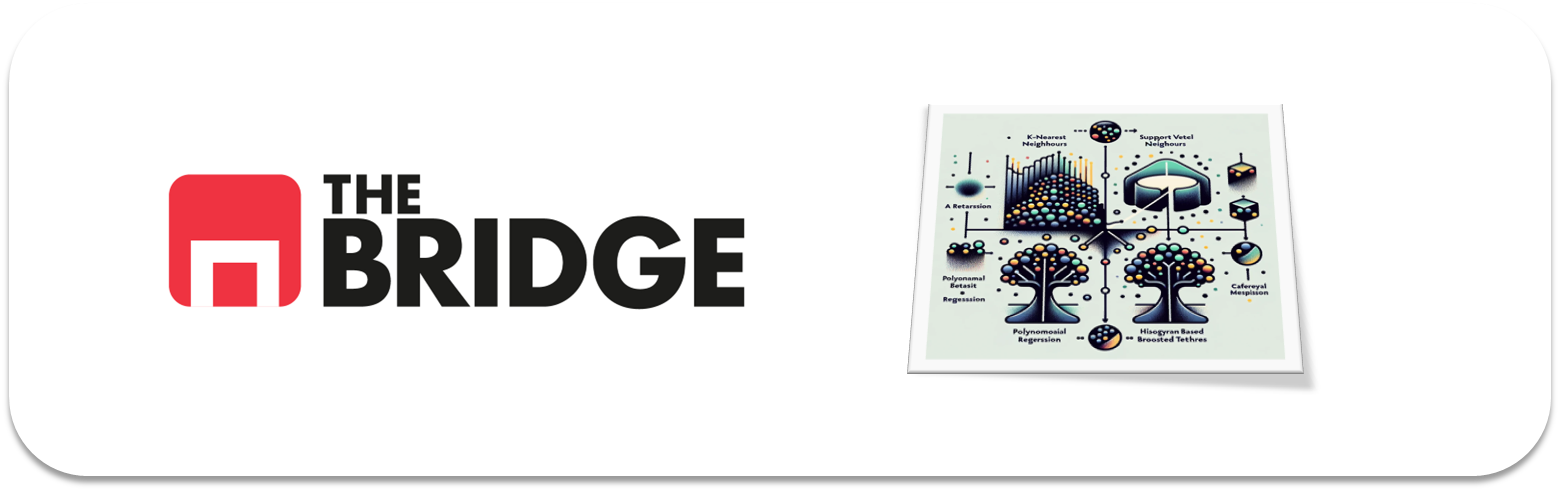

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from toolbox_ML import describe_df, tipifica_variables, get_features_num_regression, plot_features_num_regression, get_features_cat_regression, plot_features_cat_regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

#2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

#### **1. Carga de datos**

In [2]:
df_wines = pd.read_csv(
    "./data/wines_dataset.csv",
    sep="|",
    skip_blank_lines=True,
    on_bad_lines="skip",
    encoding="utf-8"
)
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [3]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Por lo que veo no hay nulos. Y falsos nulos creo que tampoco a la naturaleza de las variables ya que la mayoria son numericas continuas que son medidas de un laboratorio por lo que un 0 o tal no serian valores raros sino un hecho.

In [4]:
df_wines.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,NaN,NaN,NaN,7.215307,1.296434,3.8,6.4,7.0,7.7,15.9
volatile acidity,6497.0,NaN,NaN,NaN,0.339666,0.164636,0.08,0.23,0.29,0.4,1.58
citric acid,6497.0,NaN,NaN,NaN,0.318633,0.145318,0.0,0.25,0.31,0.39,1.66
residual sugar,6497.0,NaN,NaN,NaN,5.443235,4.757804,0.6,1.8,3.0,8.1,65.8
chlorides,6497.0,NaN,NaN,NaN,0.056034,0.035034,0.009,0.038,0.047,0.065,0.611
free sulfur dioxide,6497.0,NaN,NaN,NaN,30.525319,17.7494,1.0,17.0,29.0,41.0,289.0
total sulfur dioxide,6497.0,NaN,NaN,NaN,115.744574,56.521855,6.0,77.0,118.0,156.0,440.0
density,6497.0,NaN,NaN,NaN,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,NaN,NaN,NaN,3.218501,0.160787,2.72,3.11,3.21,3.32,4.01
sulphates,6497.0,NaN,NaN,NaN,0.531268,0.148806,0.22,0.43,0.51,0.6,2.0


In [5]:
df_wines.nunique()

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
class                     2
dtype: int64

In [6]:
describe_df(df_wines)

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
density,float64,0.0,998,15.36
residual sugar,float64,0.0,316,4.86
total sulfur dioxide,float64,0.0,276,4.25
chlorides,float64,0.0,214,3.29
volatile acidity,float64,0.0,187,2.88
free sulfur dioxide,float64,0.0,135,2.08
sulphates,float64,0.0,111,1.71
alcohol,float64,0.0,111,1.71
pH,float64,0.0,108,1.66
fixed acidity,float64,0.0,106,1.63


In [7]:
tipifica_variables(df_wines)

,nombre_variable,tipo_sugerido
0,fixed acidity,Numerica Continua
1,volatile acidity,Numerica Continua
2,citric acid,Numerica Continua
3,residual sugar,Numerica Continua
4,chlorides,Numerica Continua
5,free sulfur dioxide,Numerica Continua
6,total sulfur dioxide,Numerica Continua
7,density,Numerica Continua
8,pH,Numerica Continua
9,sulphates,Numerica Continua


Clasificación completa de las variables del dataset Wine Quality

1. Variables numéricas continuas
- Son variables medidas en escala real, con infinitos valores posibles dentro de un rango. En este dataset, casi todas las variables fisicoquímicas son continuas:

    - fixed acidity
    - volatile acidity
    - citric acid
    - residual sugar
    - chlorides
    - free sulfur dioxide
    - total sulfur dioxide
    - density
    - pH
    - sulphates
    - alcohol

- ¿Por qué son continuas?
    - Porque representan medidas químicas que pueden tomar valores decimales con alta precisión.

2. Variable numérica discreta
- Son variables numéricas que solo pueden tomar valores enteros. En este dataset:
    - quality 

- ¿Por qué es discreta?
    - Porque solo toma valores enteros (5, 6, 7…), nunca decimales.
    - Aunque es discreta, también puede tratarse como ordinal porque tiene un orden natural.

3. Variables categóricas nominales
- Son categorías sin orden. En este dataset:
    - Class (white / red)

- ¿Por qué es nominal?
    - Porque no existe un orden entre “white” y “red”. Son simplemente etiquetas.

4. Variables categóricas ordinales
- Son categorías con orden natural. En este dataset:
    - quality también puede considerarse ordinal si la usas como clasificación (peor calidad → mejor calidad)

- ¿Por qué es ordinal?
    - Porque 7 es mejor que 6, 6 mejor que 5, etc. Tiene un orden, aunque no una distancia fija entre categorías.

| **Variable**              | **Tipo**                                   | **Justificación** |
|---------------------------|---------------------------------------------|--------------------|
| fixed acidity             | Numérica continua                           | Medida química con decimales |
| volatile acidity          | Numérica continua                           | Medida química |
| citric acid               | Numérica continua                           | Medida química |
| residual sugar            | Numérica continua                           | Puede tomar valores reales |
| chlorides                 | Numérica continua                           | Concentración química |
| free sulfur dioxide       | Numérica continua                           | Medida en mg/L |
| total sulfur dioxide      | Numérica continua                           | Medida en mg/L |
| density                   | Numérica continua                           | Valor físico continuo |
| pH                        | Numérica continua                           | Escala logarítmica continua |
| sulphates                 | Numérica continua                           | Concentración química |
| alcohol                   | Numérica continua                           | % alcohólico con decimales |
| quality                   | Numérica discreta / Categórica ordinal      | Enteros 0–10 con orden |
| Class                     | Categórica nominal                          | Blanco o tinto, sin orden |


**¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?**
- Problema de negocio:
    - El dataset Wine Quality recoge características fisicoquímicas de vinos blancos y tintos del “Vinho Verde” portugués.
    - El objetivo de negocio en este primer problema es anticipar cómo clasificarán los catadores profesionales la calidad del vino. Esto permite a la bodega:

        - Planificar la producción,
        - Ajustar la distribución,
        - Definir precios según la calidad esperada.

    - El cliente indica que quiere “clasificar correctamente lo mejor posible en media”, lo que interpretamos como maximizar el recall medio (macro recall) para todas las clases de calidad.

- Problema técnico:
    - Desde el punto de vista técnico, estamos ante un problema de clasificación supervisada multiclase.

    - La variable quality toma valores enteros entre 0 y 10 (aunque en la práctica suelen ser 3–8).

    - Cada valor representa una clase que queremos predecir.

    - No buscamos predecir un número continuo, sino asignar cada vino a una categoría de calidad.

- Por tanto:
    - El modelo debe aprender a clasificar vinos en varias clases posibles.

    - La métrica clave será el recall macro, ya que el cliente quiere un rendimiento equilibrado entre todas las clases.

**¿Qué tipo de problema estamos tratando?**
- Es un problema de clasificación supervisada multiclase.
- Cada vino debe ser asignado a una de las categorías de calidad disponibles.

**¿Cuál es la variable target?**
- La variable target es quality, que representa la puntuación sensorial otorgada por catadores profesionales.

In [8]:
target= "quality"

C:\Users\César\AppData\Local\Temp\ipykernel_39892\621550918.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_wines["quality"], palette="viridis")


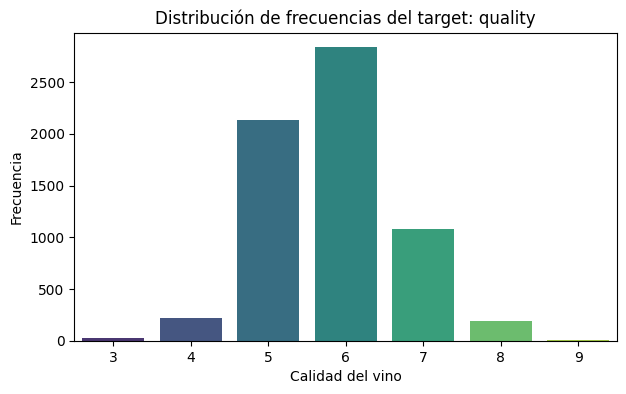

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.countplot(x=df_wines["quality"], palette="viridis")
plt.title("Distribución de frecuencias del target: quality")
plt.xlabel("Calidad del vino")
plt.ylabel("Frecuencia")
plt.show()


C:\Users\César\AppData\Local\Temp\ipykernel_39892\1771431904.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, palette="viridis")


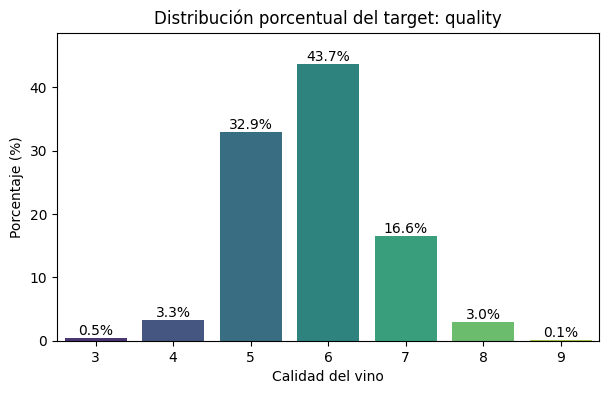

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))

# Conteo de valores
counts = df_wines["quality"].value_counts().sort_index()

# Convertir a porcentaje
percentages = counts / counts.sum() * 100

# Crear gráfico
sns.barplot(x=percentages.index, y=percentages.values, palette="viridis")

# Añadir etiquetas de porcentaje encima de cada barra
for i, value in enumerate(percentages.values):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha='center')

plt.title("Distribución porcentual del target: quality")
plt.xlabel("Calidad del vino")
plt.ylabel("Porcentaje (%)")
plt.ylim(0, percentages.max() + 5)  # margen superior
plt.show()


Clases presentes
- La variable toma valores entre 3 y 9, es decir, 7 clases distintas.

- Frecuencia por clase (de mayor a menor):

    - 6 → clase dominante
    - 5 → segunda más frecuente
    - 7 → tercera
    - Luego: 4, 8, 3
    - 9 → clase minoritaria

¿Qué implica esto?
- Desbalance claro: la mayoría de los vinos están en calidad 5, 6 y 7.
- Las clases extremas (3, 4, 8, 9) tienen muy pocos ejemplos.

Esto puede provocar que los modelos:

- Predigan mal las clases minoritarias
- Se sesguen hacia las clases frecuentes
- Tengan recall bajo en clases raras

In [9]:
def group_quality(q):
    if q <= 4:
        return 0   # Malo
    elif q <= 6:
        return 1   # Medio
    else:
        return 2   # Alto

df_wines["quality_grouped"] = df_wines["quality"].apply(group_quality)


C:\Users\César\AppData\Local\Temp\ipykernel_35488\2036411003.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_wines["quality_grouped"], palette="viridis")


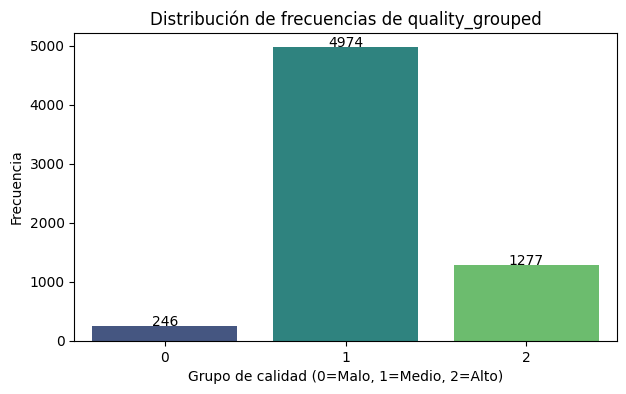

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
ax = sns.countplot(x=df_wines["quality_grouped"], palette="viridis")

# Añadir los conteos encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,   # posición X centrada
        height + 5,                      # un poco por encima de la barra
        f"{int(height)}",                # el número de muestras
        ha='center'
    )

plt.title("Distribución de frecuencias de quality_grouped")
plt.xlabel("Grupo de calidad (0=Malo, 1=Medio, 2=Alto)")
plt.ylabel("Frecuencia")
plt.show()


C:\Users\César\AppData\Local\Temp\ipykernel_35488\2770463783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, palette="viridis")


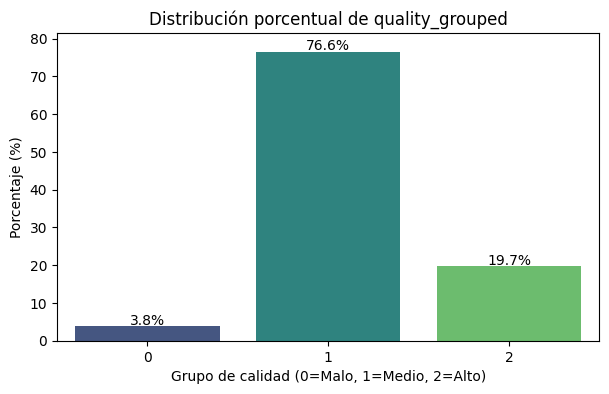

In [11]:
plt.figure(figsize=(7,4))

# Conteo de valores
counts = df_wines["quality_grouped"].value_counts().sort_index()

# Convertir a porcentaje
percentages = counts / counts.sum() * 100

# Crear gráfico
sns.barplot(x=percentages.index, y=percentages.values, palette="viridis")

# Añadir etiquetas de porcentaje encima de cada barra
for i, value in enumerate(percentages.values):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha='center')

plt.title("Distribución porcentual de quality_grouped")
plt.xlabel("Grupo de calidad (0=Malo, 1=Medio, 2=Alto)")
plt.ylabel("Porcentaje (%)")
plt.ylim(0, percentages.max() + 5)
plt.show()


#### **2. Lista flexible de features**

In [40]:
df= df_wines.copy()
df_regresion= df_wines.copy()

In [14]:
target_col= "quality_grouped"
features = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol'
]

#### **3. Train/Test split (ANTES de la limpieza)**

In [15]:
train_set, test_set = train_test_split(
    df,
    test_size=0.20,
    random_state=42,
    stratify=df[target_col]
)


### **4. Mini-EDA**

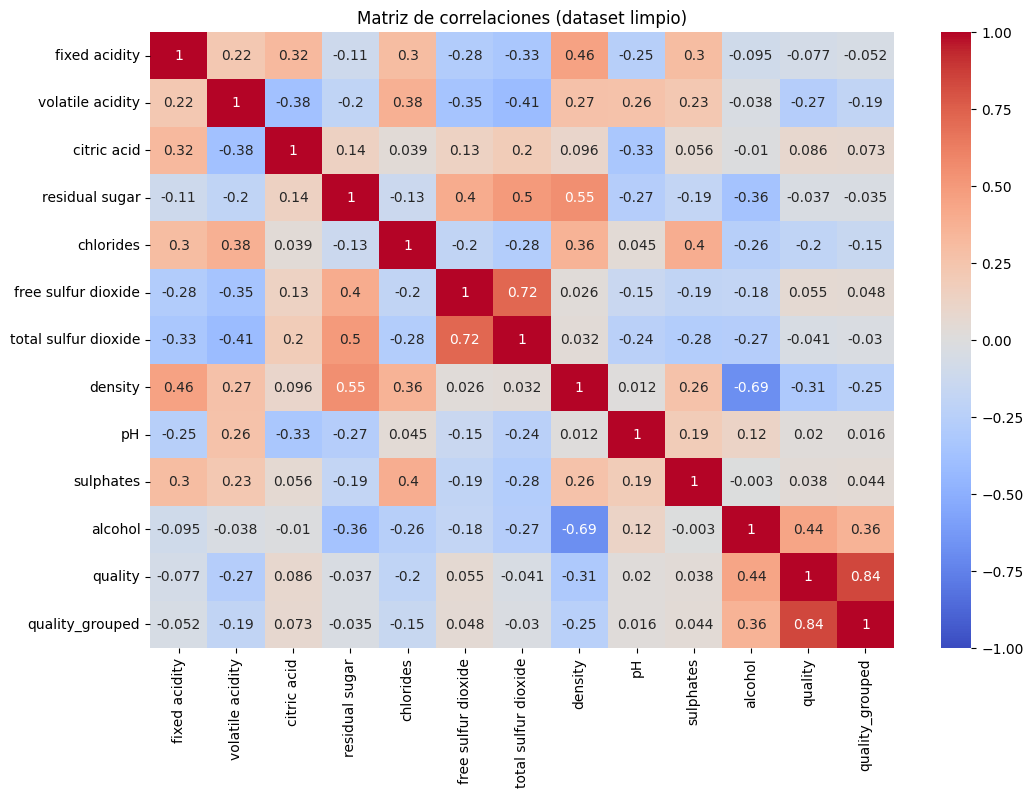

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.title("Matriz de correlaciones (dataset limpio)")
plt.show()

### Variables más correlacionadas con `quality`

| **Variable**         | **Correlación con `quality`** | **Interpretación** |
|----------------------|-------------------------------|---------------------|
| `alcohol`            | +0.44                         | La más correlacionada. A mayor grado alcohólico, mayor calidad percibida. Muy relevante para el modelo. |
| `density`            | –0.31                         | A menor densidad, mayor calidad. Tiene sentido: vinos más densos suelen tener más azúcar residual o menos alcohol. |
| `volatile acidity`   | –0.27                         | A mayor acidez volátil, menor calidad. El exceso de ácido acético puede dar sabor a vinagre. |
| `chlorides`          | –0.20                         | Más cloruros (salinidad) se asocian con menor calidad. |
| `fixed acidity`      | –0.077                        | Correlación débil. No parece ser un buen predictor por sí sola. |


“La variable alcohol presenta la correlación positiva más alta con la calidad del vino (r = 0.44), lo que indica que los vinos con mayor grado alcohólico tienden a recibir mejores puntuaciones. Por el contrario, variables como volatile acidity (r = –0.27) y density (r = –0.31) muestran correlaciones negativas, asociando niveles altos con menor calidad. La mayoría de las demás variables presentan correlaciones débiles, lo que sugiere que la relación entre las propiedades fisicoquímicas y la calidad sensorial del vino es compleja y no lineal. Esto justifica el uso de modelos no lineales para capturar interacciones y patrones más sutiles.”

In [17]:
df.corr(numeric_only=True)["quality_grouped"].sort_values(ascending=False)


quality_grouped         1.000000
quality                 0.843644
alcohol                 0.360580
citric acid             0.073082
free sulfur dioxide     0.048382
sulphates               0.043719
pH                      0.016064
total sulfur dioxide   -0.029793
residual sugar         -0.035250
fixed acidity          -0.052052
chlorides              -0.154945
volatile acidity       -0.194906
density                -0.246116
Name: quality_grouped, dtype: float64

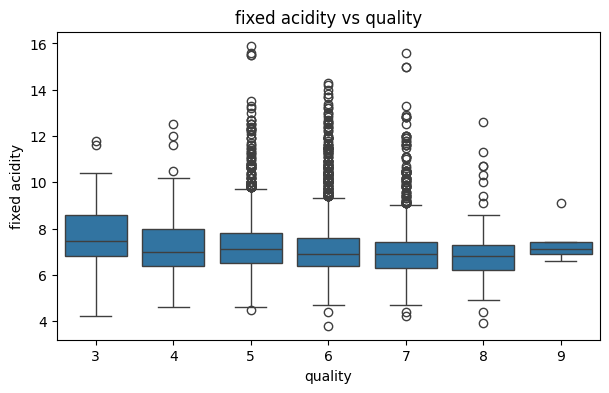

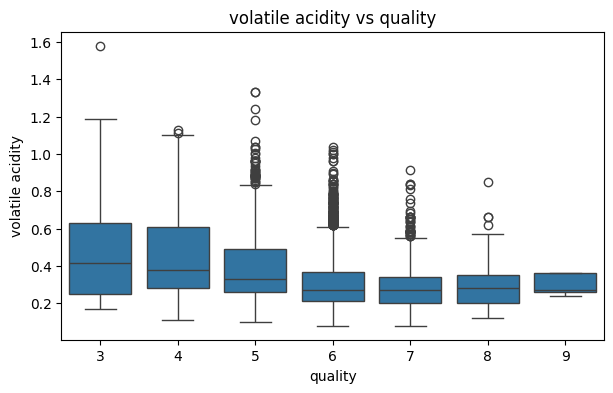

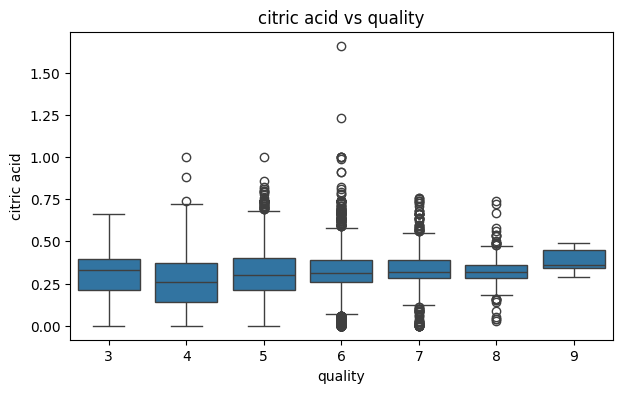

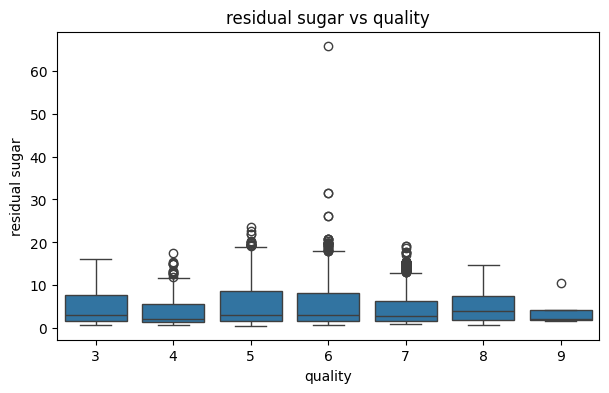

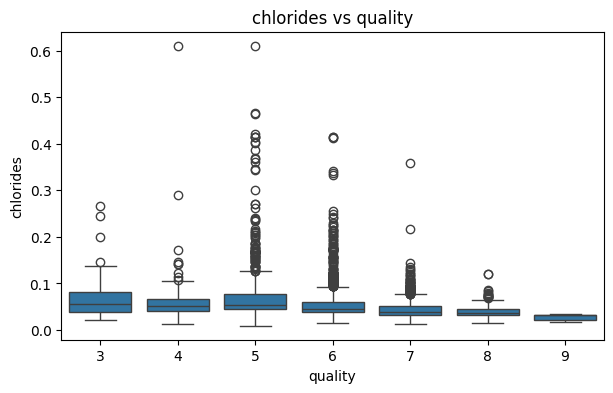

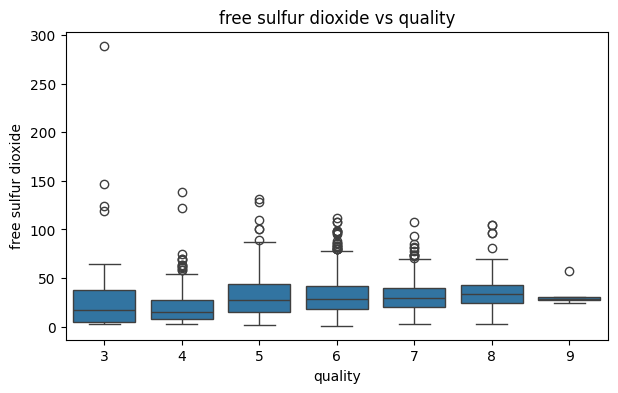

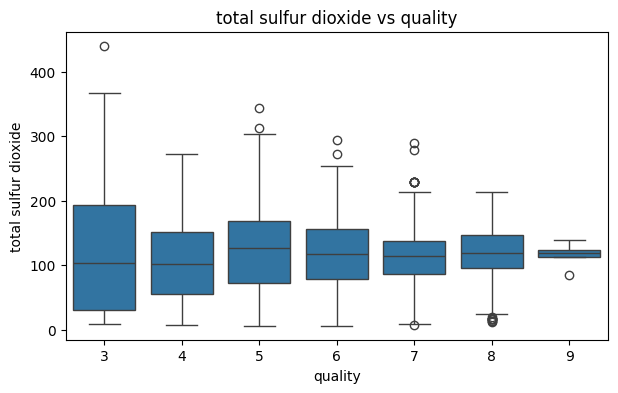

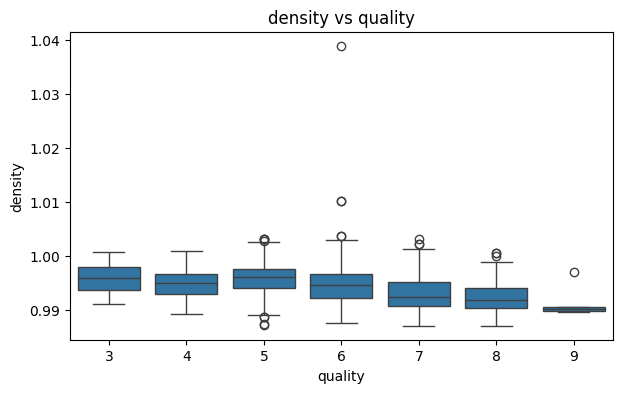

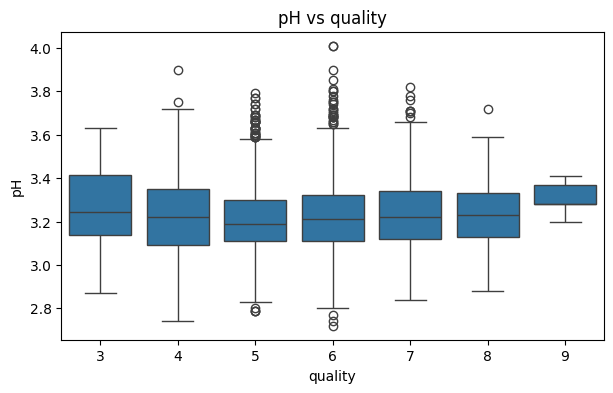

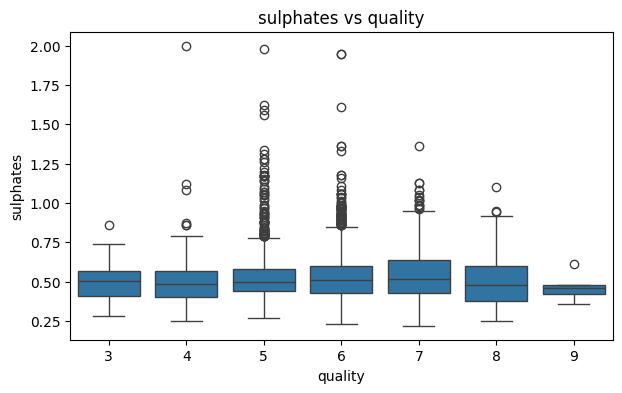

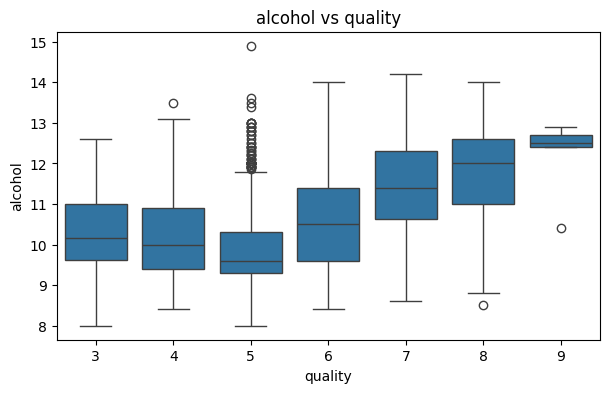

In [18]:
variables = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol"
]

for var in variables:
    plt.figure(figsize=(7,4))
    sns.boxplot(x="quality", y=var, data=df)
    plt.title(f"{var} vs quality")
    plt.show()


1. fixed acidity vs quality
- La variable fixed acidity muestra una dispersión muy similar en casi todas las clases de calidad: las cajas tienen alturas parecidas, los bigotes se extienden a rangos similares y hay outliers en todos los grupos.
- La mediana más alta aparece en la clase 3, lo que indica que los vinos de menor calidad tienden a tener una acidez fija ligeramente mayor.
- A partir de calidad 4 en adelante, las medianas se mantienen en un rango muy estrecho (aprox. 6.8–7.0), sin una tendencia clara ni creciente ni decreciente.
- La clase 9 presenta una dispersión mucho menor, con valores muy concentrados y casi sin outliers, lo que sugiere que los vinos de calidad excelente tienen perfiles más homogéneos en esta variable.

2. volatile acidity vs quality
- Claramente más alta en vinos de baja calidad (3–4).
- Disminuye progresivamente.
- Conclusión: muy buen predictor. A mayor acidez volátil, menor calidad.

3. citric acid vs quality
- Distribución bastante homogénea.
- Ligerísima tendencia ascendente en calidad alta.
- Conclusión: aporta poco por sí sola, pero puede ayudar en combinación.

4. residual sugar vs quality
- Mucha dispersión, especialmente en calidad 6.
- Mediana estable entre clases.
- Conclusión: no parece tener relación directa con la calidad.

5. chlorides vs quality
- Más altos en vinos de calidad baja (3–4).
- Disminuyen en calidad 6–9.
- Conclusión: buen predictor. Más salinidad → menor calidad.

6. free sulfur dioxide vs quality
- Distribución amplia en todas las clases.
- No hay patrón claro.
- Conclusión: no aporta señal lineal clara.

7. total sulfur dioxide vs quality
- Similar a la anterior, pero con más dispersión en calidad baja.
- Mediana ligeramente menor en vinos de calidad alta.
- Conclusión: puede aportar algo en modelos no lineales.

8. density vs quality
- Disminuye ligeramente con la calidad.
- Vinos de calidad alta tienden a tener menor densidad.
- Conclusión: buen predictor indirecto (relacionado con alcohol y azúcar).

9. pH vs quality
- Distribución muy estable.
- Mediana casi idéntica en todas las clases.
- Conclusión: no aporta señal discriminante.

10. sulphates vs quality
- Ligeramente más altos en vinos de calidad alta.
- Pero la diferencia es muy sutil.
- Conclusión: puede ayudar en combinación, pero no es fuerte por sí sola.

11. alcohol vs quality
- Claramente más alto en vinos de calidad 7–9.
- Mediana creciente con la calidad.
- Conclusión: el mejor predictor individual. Debe estar en el modelo

### Valoración de variables predictoras respecto a `quality`

| **Variable**           | **Valor predictivo** | **Justificación breve**                            |
|------------------------|----------------------|----------------------------------------------------|
| `alcohol`              | ▮▮▮▮                 | Más alcohol → más calidad                          |
| `volatile acidity`     | ▮▮▮                  | Más acidez → menos calidad                         |
| `chlorides`            | ▮▮▮                  | Más salinidad → menos calidad                      |
| `density`              | ▮▮                   | Menor densidad → más calidad                       |
| `fixed acidity`        | ▮                    | Mediana más alta en clase 3, pero patrón débil     |
| `citric acid`          | ▮                    | Tendencia leve en clases altas                     |
| `sulphates`            | ▮                    | Aporta poco por sí sola                            |
| `residual sugar`       | ✖                    | Sin patrón claro                                   |
| `pH`                   | ✖                    | Mediana estable entre clases                       |
| `free/total SO₂`       | ✖                    | Mucha dispersión, sin relación clara con calidad   |


In [19]:
X_train = train_set[features]
y_train = train_set[target]

X_test = test_set[features]
y_test = test_set[target]


#### **5. Construccion de modelos**

In [20]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score

scaler = RobustScaler()

Funciona mejor que StandardScaler cuando hay outliers (como en tu dataset).

**Regresion logistica**

In [21]:

pipe_logreg = ImbPipeline([
    ("scaler", scaler),
    ("model", LogisticRegression(max_iter=200, random_state=42, multi_class="multinomial", class_weight="balanced"))
])


**Random Forest (NO requiere escalado)**

In [22]:
pipe_rf = ImbPipeline([
    ("model", RandomForestClassifier(random_state=42, class_weight="balanced"))
])


**Gradient Boosting (NO requiere escalado)**

In [24]:
pipe_gb = ImbPipeline([
    ("model", GradientBoostingClassifier(random_state=42))
])


**KNN (requiere escalado)**

In [25]:
pipe_knn3 = ImbPipeline([
    ("scaler", scaler),
    ("model", KNeighborsClassifier(n_neighbors=3))
])

pipe_knn7 = ImbPipeline([
    ("scaler", scaler),
    ("model", KNeighborsClassifier(n_neighbors=7))
])


#### **6. Validación cruzada con recall macro (métrica principal)**

In [26]:
from sklearn.model_selection import cross_val_score

models = {
    "Regresión Logística": pipe_logreg,
    "Random Forest": pipe_rf,
    "Gradient Boosting": pipe_gb,
    "KNN (k=3)": pipe_knn3,
    "KNN (k=7)": pipe_knn7
}

results = {}

for name, model in models.items():
    score = cross_val_score(
        model,
        X_train,
        y_train,
        cv=3,
        scoring="balanced_accuracy",
        n_jobs=-1
    )
    results[name] = score.mean()
    print(f"{name}: Recall medio = {score.mean():.4f}")


Regresión Logística: Recall medio = 0.6065
Random Forest: Recall medio = 0.4983
Gradient Boosting: Recall medio = 0.4766
KNN (k=3): Recall medio = 0.5118
KNN (k=7): Recall medio = 0.4658


#### **7. Eleccion del mejor modelo**

In [27]:
# Ordenar los modelos por su score (de mayor a menor)
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Extraer nombres de los 3 mejores modelos
best_model_name = sorted_results[0][0]
second_best_model_name = sorted_results[1][0]
third_best_model_name = sorted_results[2][0]

print("Best model:", best_model_name)
print("Second best model:", second_best_model_name)
print("Third best model:", third_best_model_name)

# Instanciar los modelos ganadores
best_model = models[best_model_name]
second_best_model = models[second_best_model_name]
third_best_model = models[third_best_model_name]


Best model: Regresión Logística
Second best model: KNN (k=3)
Third best model: Random Forest


In [28]:
best_model

Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=200,
                                    multi_class='multinomial',
                                    random_state=42))])

#### **8. Entrenamiento del mejor modelo**

In [29]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=200,
                                    multi_class='multinomial',
                                    random_state=42))])

#### **9. Resultados de Train**

In [30]:
y_predict_train=best_model.predict(X_train)
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.10      0.63      0.18       197
           1       0.88      0.45      0.60      3979
           2       0.40      0.76      0.52      1021

    accuracy                           0.52      5197
   macro avg       0.46      0.61      0.43      5197
weighted avg       0.76      0.52      0.56      5197



#### **10. Features importance del modelo**

In [31]:
import pandas as pd
import numpy as np

print("=== Feature Importances del mejor modelo ===")

# Extraer el modelo interno del pipeline
modelo_interno = best_model.named_steps["model"]

# Caso 1: Regresión Logística → coeficientes
if isinstance(modelo_interno, LogisticRegression):
    coefs = modelo_interno.coef_[0]
    importance_df = pd.DataFrame({
        "feature": X_train.columns,
        "importance": coefs
    }).sort_values("importance", ascending=False)

# Caso 2: Random Forest o Gradient Boosting → feature_importances_
elif hasattr(modelo_interno, "feature_importances_"):
    importances = modelo_interno.feature_importances_
    importance_df = pd.DataFrame({
        "feature": X_train.columns,
        "importance": importances
    }).sort_values("importance", ascending=False)

# Caso 3: KNN → no tiene importancias
else:
    importance_df = pd.DataFrame({
        "feature": X_train.columns,
        "importance": ["N/A (KNN no tiene importancias)"] * len(X_train.columns)
    })

print(importance_df)


=== Feature Importances del mejor modelo ===
                 feature  importance
1       volatile acidity    0.682907
6   total sulfur dioxide    0.493912
8                     pH    0.120037
2            citric acid    0.086816
0          fixed acidity    0.071945
4              chlorides    0.070421
3         residual sugar   -0.234054
9              sulphates   -0.299159
7                density   -0.469314
5    free sulfur dioxide   -0.529967
10               alcohol   -0.999021


#### **11. Optimización del Modelo mediante GridSearchCV**

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Métrica: recall macro (tu métrica principal)
scoring = "balanced_accuracy"

# Grid de hiperparámetros para Random Forest
param_grid_rf = {
    "model__n_estimators": [100, 200, 300],   # número de árboles
    "model__max_depth": [None, 10, 20, 30],   # profundidad máxima
    "model__min_samples_split": [2, 5, 10],   # mínimo para dividir nodo
    "model__min_samples_leaf": [1, 2, 4]      # mínimo por hoja
}

# GridSearchCV
grid_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring=scoring,
    n_jobs=-1
)

# Entrenar GridSearch
grid_rf.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_rf.best_params_)
print("Mejor recall_macro (CV):", grid_rf.best_score_)


Mejores hiperparámetros: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Mejor recall_macro (CV): 0.5909537512683528


In [33]:
y_predict=grid_rf.predict(X_test)

#### **12. Evaluación Final del Modelo en el Conjunto de Test**

In [34]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.36      0.16      0.23        49
           1       0.89      0.83      0.86       995
           2       0.55      0.76      0.64       256

    accuracy                           0.79      1300
   macro avg       0.60      0.58      0.57      1300
weighted avg       0.81      0.79      0.79      1300



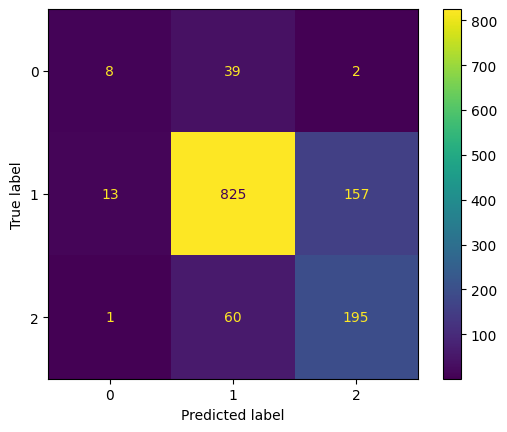

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

# Mostrar matriz de confusión con estilo sklearn
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

- Métricas globales:
    - Accuracy = 0.79 → muy sólido para este dataset
    - Macro recall = 0.58 → penalizado por la clase 0
    - Weighted F1 = 0.79 → refleja buen rendimiento general
    - Balanced accuracy ≈ 0.58–0.60 → coherente con lo esperado

Matriz de confusión (interpretación visual)
- Clase 0 (malo, el modelo no logra distinguir bien esta clase.):
    - 8 aciertos
    - 39 confundidos como clase 1
    - 2 confundidos como clase 2

- Clase 1 (medio, El modelo la predice muy bien, pero hay algo de confusión con clase 2.):

    - 825 aciertos
    - 13 confundidos como clase 0
    - 157 confundidos como clase 

- Clase 2 (alto, buen recall, pero precision baja por sobrepredicción):

    - 195 aciertos
    - 60 confundidos como clase 1
    - 1 confundido como clase 0

- ¿Qué significa esto?
    - El modelo aprende muy bien la clase media (1)
    - Tiene dificultades con la clase baja (0) por su tamaño reducido
    - La clase alta (2) tiene buen recall, pero se confunde con la media
    - El modelo está sesgado hacia la clase dominante, como es esperable

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [43]:
df_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class,quality_grouped
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white,1
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white,1
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white,2
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white,0
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,white,1
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red,1
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,white,1
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,red,1


In [44]:
# Copia del dataframe
df_reg = df_wines.copy()


Análisis gráfico de la variable target:

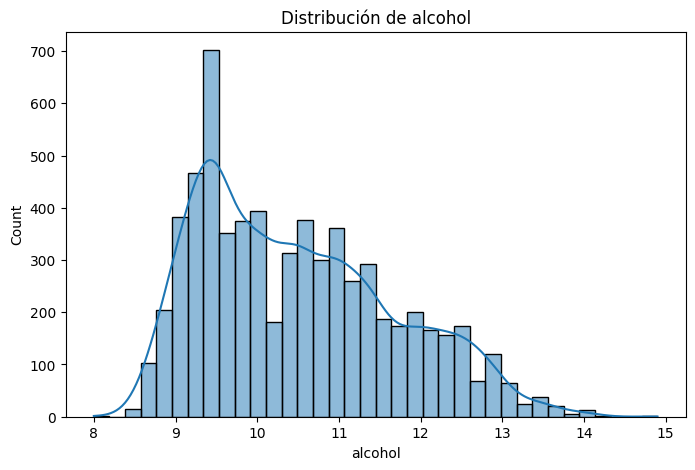

In [45]:

plt.figure(figsize=(8,5))
sns.histplot(df_reg["alcohol"], kde=True)
plt.title("Distribución de alcohol")
plt.show()

In [48]:

# Codificar 'class' como variable numérica (0=red, 1=white por ejemplo)
df_reg["class_num"] = (df_reg["class"] == "white").astype(int)

# Definir target y features para REGRESIÓN
target_reg = "alcohol"

features_reg = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "quality_grouped",
    "class_num"
]

# Train/test split (mismo random_state para coherencia)
train_reg, test_reg = train_test_split(
    df_reg,
    test_size=0.20,
    random_state=42
)

X_train_reg = train_reg[features_reg]
y_train_reg = train_reg[target_reg]

X_test_reg = test_reg[features_reg]
y_test_reg = test_reg[target_reg]


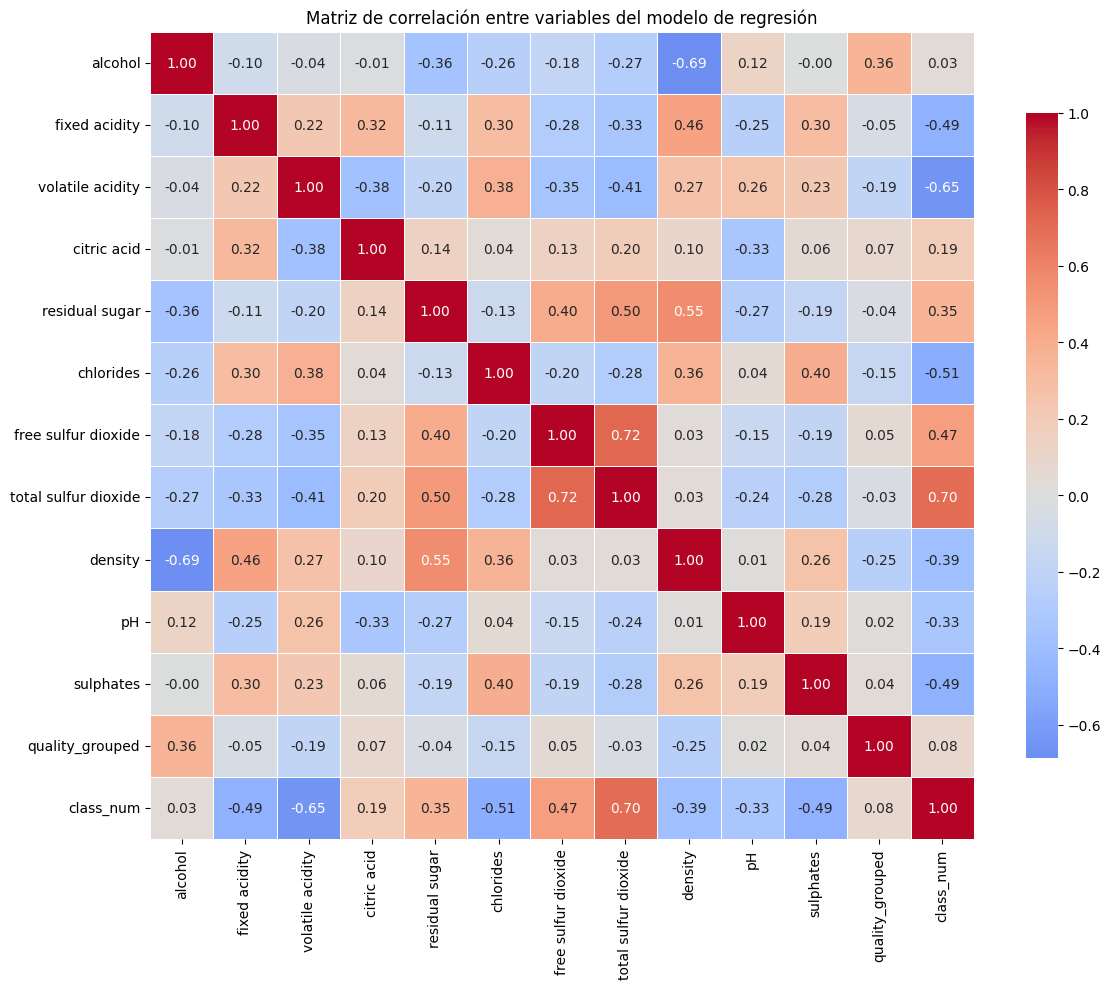

In [49]:
# Seleccionar únicamente las variables relevantes para regresión
vars_corr = [target_reg] + features_reg

plt.figure(figsize=(12, 10))

corr_matrix = df_reg[vars_corr].corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Matriz de correlación entre variables del modelo de regresión")
plt.tight_layout()
plt.show()


- Density es el predictor más fuerte, pero está correlacionado con residual sugar y alcohol. Puede causar multicolinealidad en modelos lineales, pero es muy útil en árboles.

- Quality_grouped tiene buena correlación con alcohol

Eleccion de métrica:

- La elección de la métrica en un problema de regresión debe alinearse con el objetivo de negocio, no solo con criterios estadísticos. En este caso, el enunciado indica explícitamente que a la bodega le interesa:

    - “equivocarse lo menos posible porcentualmente sobre el grado alcohólico real”.

- Esto convierte al MAPE (Mean Absolute Percentage Error) en la métrica más adecuada, por varias razones:

Utilizo `neg_mean_absolute_percentage_error` como métrica de scoring porque scikit‑learn requiere que todas las métricas se interpreten como “cuanto mayor, mejor”. Como el MAPE es un error que debe minimizarse, la librería devuelve su valor con signo negativo. 


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

scaler = RobustScaler()

models_reg = {
    "Regresión Lineal": Pipeline([
        ("scaler", scaler),
        ("model", LinearRegression())
    ]),
    "Random Forest": Pipeline([
        ("model", RandomForestRegressor(random_state=42))
    ]),
    "Gradient Boosting": Pipeline([
        ("model", GradientBoostingRegressor(random_state=42))
    ])
}

results_reg = {}

for name, model in models_reg.items():
    scores = cross_val_score(
        model,
        X_train_reg,
        y_train_reg,
        cv=5,
        scoring="neg_mean_absolute_percentage_error",
        n_jobs=-1
    )
    results_reg[name] = scores.mean()
    print(f"{name}: MAPE medio (CV) = {-scores.mean():.4f}")


Regresión Lineal: MAPE medio (CV) = 0.0338
Random Forest: MAPE medio (CV) = 0.0267
Gradient Boosting: MAPE medio (CV) = 0.0347


- Con esos resultados de validación cruzada, el modelo de Random Forest es claramente el mejor para predecir el grado alcohólico del vino.

- ¿Por qué es el mejor?
    - Porque tiene el MAPE más bajo, lo que significa:
    - Error porcentual medio más pequeño
    - Mayor precisión relativa en la predicción del alcohol
    - Mejor capacidad de generalización según la validación cruzada

In [38]:
sorted_results_reg = sorted(results_reg.items(), key=lambda x: x[1], reverse=True)

best_reg_name = sorted_results_reg[0][0]
second_reg_name = sorted_results_reg[1][0]
third_reg_name = sorted_results_reg[2][0]

print("Mejor modelo (regresión):", best_reg_name)
print("Segundo:", second_reg_name)
print("Tercero:", third_reg_name)

best_reg_model = models_reg[best_reg_name]


Mejor modelo (regresión): Random Forest
Segundo: Regresión Lineal
Tercero: Gradient Boosting


- Utilizo GridSearchCV para buscar los mejores hiperparametros:

In [39]:
from sklearn.model_selection import GridSearchCV

scoring_reg = "neg_mean_absolute_percentage_error"

param_grid_rf_reg = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}

grid_rf_reg = GridSearchCV(
    estimator=models_reg["Random Forest"],
    param_grid=param_grid_rf_reg,
    cv=5,
    scoring=scoring_reg,
    n_jobs=-1
)

grid_rf_reg.fit(X_train_reg, y_train_reg)

print("Mejores hiperparámetros (RF reg):", grid_rf_reg.best_params_)
print("Mejor MAPE (CV):", -grid_rf_reg.best_score_)


Mejores hiperparámetros (RF reg): {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Mejor MAPE (CV): 0.026606390455449568


- Tras realizar una búsqueda exhaustiva de hiperparámetros mediante GridSearchCV, el modelo de Random Forest ha encontrado su configuración óptima para predecir el grado alcohólico. La búsqueda se realizó evaluando múltiples combinaciones de parámetros mediante validación cruzada (CV=5) y utilizando MAPE como métrica principal, ya que el objetivo del proyecto es minimizar el error porcentual. 

- Los mejores hiperparámetros obtenidos fueron: 
    - n_estimators = 300 
    - max_depth = None 
    - min_samples_split = 2 
    - min_samples_leaf = 1 

- Con esta configuración, el modelo alcanzó un MAPE medio de 0.0266 en validación cruzada, lo que implica un error porcentual medio del 2.66%. Este valor es inferior al obtenido por la regresión lineal y por Gradient Boosting, confirmando que Random Forest es el modelo con mejor capacidad predictiva para esta tarea. 
- En conclusión, el proceso de optimización ha permitido seleccionar un modelo robusto y preciso, capaz de capturar relaciones no lineales entre las variables fisicoquímicas del vino y su grado alcohólico, ofreciendo el mejor rendimiento entre todas las alternativas evaluadas.